<a href="https://colab.research.google.com/github/aishe818/simulation-lab/blob/main/Lab_Assignment1_1098.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats #new library
import matplotlib.pyplot as plt

In [4]:
# Step 1: Define the dataset
k = 98   # last two digit of ID 98


# Formula: exam scores = 60 + randint(0, 15, size=12) + (k % 5)
np.random.seed(42)  # for reproducibility
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k % 5)

# Display dataset
print("Generated Exam Scores:", exam_scores)


# Step 2: Define the population mean (hypothesized mean)
hypothesized_mean = 65  # Null Hypothesis (H₀): The average class score is 65

#Step 3: Perform One-Sample t-test
t_stat, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)

sample_mean = np.mean(exam_scores)
sample_std = np.std(exam_scores, ddof=1)  # sample standard deviation
n = len(exam_scores)
df = n - 1  # degrees of freedom

# Step 4: Display the results
print(f'Sample Mean: {np.mean(exam_scores):.2f}')
print(f'Hypothesized Population Mean: {hypothesized_mean:.2f}')
print(f't-Statistic: {t_stat:.2f}')
print(f'Degrees of Freedom: {len(exam_scores) - 1}')
print(f'p-Value: {p_value:.4f}')

#print Confidence Interval (95%)
confidence = 0.95
alpha = 1 - confidence
ci_low, ci_high = stats.t.interval(confidence, df, loc=sample_mean, scale=stats.sem(exam_scores))

print("\n95% Confidence Interval: ({:.2f}, {:.2f})".format(ci_low, ci_high))

Generated Exam Scores: [69 66 75 77 73 70 75 67 69 72 65 69]
Sample Mean: 70.58
Hypothesized Population Mean: 65.00
t-Statistic: 5.06
Degrees of Freedom: 11
p-Value: 0.0004

95% Confidence Interval: (68.15, 73.01)


In [5]:
# Step 5: Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. The average class score is significantly different from {hypothesized_mean:.2f}.')
else:
    print(f'Fail to reject the null hypothesis. The average class score is not significantly different from {hypothesized_mean:.2f}.')

Reject the null hypothesis. The average class score is significantly different from 65.00.


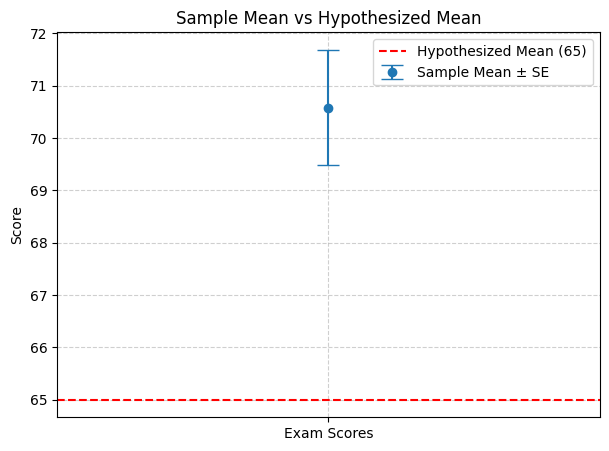

In [6]:
# Step 6: Visualization
plt.figure(figsize=(7,5))
plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=8, label='Sample Mean ± SE')
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', label='Hypothesized Mean (65)')
plt.xlim(0, 2)
plt.xticks([1], ['Exam Scores'])
plt.ylabel('Score')
plt.title('Sample Mean vs Hypothesized Mean')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Student Work
•	Data: [5.2, 5.4, 5.1, 5.6, 5.3, 5.8]<br>
•	Hypothesized mean: 5.5 <br>
•	Tasks:<br>
o	Calculate the t-statistic and p-value.<br>
o	Interpret and visualize the result at a 0.05 significance level.<br>
